# Cat or dog? 
### Image classification project

In [1]:
# Connect Google Colab with my Drive
from google.colab import drive 
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [2]:
# Unzip the folder 
!unzip -q /content/gdrive/MyDrive/CatsDogs.zip 

In [3]:
# Import necessary libraries 
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten, Dropout 
from tensorflow.keras import layers

In [4]:
# Delete corrupted images
import os 
for folder_path in ["/content/CatsDogs/Cats", "/content/CatsDogs/Dogs"]:
  for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    try:
      obj = open(file_path, "rb")
      is_jfif = tf.compat.as_bytes("JFIF") in obj.peek(10)
    finally:
      obj.close()
    if is_jfif == False:
      os.remove(file_path)

In [5]:
print("Cats photos after remotion: " +str(len(os.listdir('/content/CatsDogs/Cats'))))
print("Dogs photos after remotion: " +str(len(os.listdir('/content/CatsDogs/Dogs'))))

Cats photos after remotion: 11741
Dogs photos after remotion: 11669


In [ ]:
# Assign hyperparameters values 
INPUT_SHAPE = (128,128) 
BATCH_SIZE = 32

In [ ]:
# Create a dataframe from the flow_from_dataframe function 
df = pd.DataFrame(columns=["Path", "Class"])
dirs = ['/content/CatsDogs/Cats', '/content/CatsDogs/Dogs']
for dir in dirs:
  paths= os.listdir(dir)
  class_name=dir.split("/")[-1]
  df_temp = pd.DataFrame({"Path": paths, "Class": class_name})
  df_temp["Path"] = dir + "/" + df_temp["Path"].astype(str)
  df = pd.concat([df,df_temp])
  
df.sort_values(by="Path", inplace=True, ignore_index=True)

In [ ]:
shuffled = df.sample(frac=1,random_state=1)
shuffled.tail()

,Path,Class
10955,/content/CatsDogs/Cats/9244.jpg,Cats
17289,/content/CatsDogs/Dogs/4080.jpg,Dogs
5192,/content/CatsDogs/Cats/373.jpg,Cats
12172,/content/CatsDogs/Dogs/10413.jpg,Dogs
235,/content/CatsDogs/Cats/10221.jpg,Cats


In [ ]:
# Split into training, validation and test set
rowsplice = int(0.8*len(shuffled))
df_train_valid = shuffled.iloc[:rowsplice]
df_test = shuffled.iloc[rowsplice:]

In [ ]:
# Image data generators 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagenA = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
datagenB= ImageDataGenerator( rescale= 1.0/255)

In [ ]:
training_ds= datagenA.flow_from_dataframe(dataframe=df_train_valid,
                                           directory="/content/CatsDogs",
                                           x_col ='Path',
                                           y_col='Class',
                                           target_size=(128,128),
                                           class_mode='binary',
                                           subset='training',
                                           seed=10)

Found 14983 validated image filenames belonging to 2 classes.


In [ ]:
validation_ds= datagenA.flow_from_dataframe(dataframe=df_train_valid,
                                             directory="/content/CatsDogs",
                                             x_col ='Path',
                                             y_col='Class',
                                             target_size=(128,128),
                                             class_mode='binary',
                                             subset='validation',
                                             seed=10)

Found 3745 validated image filenames belonging to 2 classes.


In [ ]:
test_ds= datagenB.flow_from_dataframe(dataframe=df_test,
                                             directory="/content/CatsDogs",
                                             x_col ='Path',
                                             y_col='Class',
                                             target_size=(128,128),
                                             class_mode='binary',
                                             shuffle=False,
                                             seed=10)

Found 4682 validated image filenames belonging to 2 classes.


**Baseline model**

In [ ]:
# Model 1
model_1=Sequential()

model_1.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (128,128,3)))
model_1.add(Activation(activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Flatten())
model_1.add(Dense(64)) 
model_1.add(Activation("relu"))

model_1.add(Dense(1))
model_1.add(Activation("sigmoid"))

In [ ]:
# Model compile 
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= ["accuracy"])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 64)                8128576   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [ ]:
# Model fit 
mod_1=model_1.fit(training_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
469/469 [==============================] - 288s 611ms/step - loss: 0.6687 - accuracy: 0.6510 - val_loss: 0.5683 - val_accuracy: 0.7028
Epoch 2/10
469/469 [==============================] - 295s 629ms/step - loss: 0.4909 - accuracy: 0.7631 - val_loss: 0.5615 - val_accuracy: 0.7105
Epoch 3/10
469/469 [==============================] - 290s 617ms/step - loss: 0.3818 - accuracy: 0.8329 - val_loss: 0.5782 - val_accuracy: 0.7212
Epoch 4/10
469/469 [==============================] - 291s 620ms/step - loss: 0.2723 - accuracy: 0.8853 - val_loss: 0.6988 - val_accuracy: 0.7146
Epoch 5/10
469/469 [==============================] - 268s 572ms/step - loss: 0.1803 - accuracy: 0.9305 - val_loss: 0.8181 - val_accuracy: 0.7194
Epoch 6/10
469/469 [==============================] - 304s 648ms/step - loss: 0.1048 - accuracy: 0.9646 - val_loss: 0.9954 - val_accuracy: 0.7049
Epoch 7/10
469/469 [==============================] - 294s 627ms/step - loss: 0.0570 - accuracy: 0.9832 - val_loss: 1.1333 -

Text(0.5, 1.0, 'Training and Validation loss')

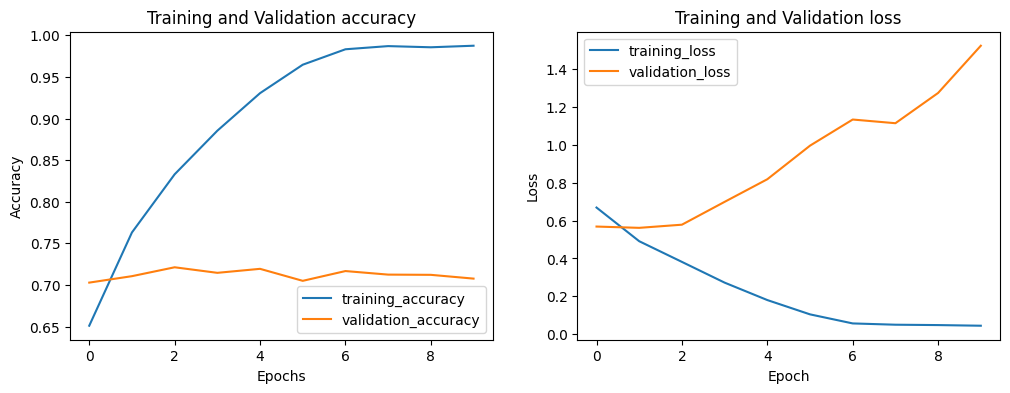

In [ ]:
# Model plot 
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_1.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_1.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_1.history['loss'], label='training_loss')
plt.plot(mod_1.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
# Model testing
model_1.evaluate(test_ds)

147/147 [==============================] - 47s 315ms/step - loss: 1.4926 - accuracy: 0.7142


[1.492593765258789, 0.7142246961593628]

**Models with 2 convolutional layers**

In [ ]:
# Modello 2 
model_2=Sequential()

model_2.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (128,128,3)))
model_2.add(Activation(activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(filters=32, kernel_size=(3,3)))
model_2.add(Activation(activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Flatten())
model_2.add(Dense(64)) 
model_2.add(Activation("relu"))

model_2.add(Dense(1))
model_2.add(Activation("sigmoid"))

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= ["accuracy"])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 activation_3 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 activation_4 (Activation)   (None, 61, 61, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                  

In [ ]:
mod_2=model_2.fit(training_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
469/469 [==============================] - 395s 838ms/step - loss: 0.6153 - accuracy: 0.6497 - val_loss: 0.5656 - val_accuracy: 0.6927
Epoch 2/10
469/469 [==============================] - 385s 821ms/step - loss: 0.4944 - accuracy: 0.7588 - val_loss: 0.4971 - val_accuracy: 0.7554
Epoch 3/10
469/469 [==============================] - 393s 838ms/step - loss: 0.4295 - accuracy: 0.7990 - val_loss: 0.5043 - val_accuracy: 0.7525
Epoch 4/10
469/469 [==============================] - 393s 838ms/step - loss: 0.3583 - accuracy: 0.8396 - val_loss: 0.4910 - val_accuracy: 0.7714
Epoch 5/10
469/469 [==============================] - 391s 833ms/step - loss: 0.2815 - accuracy: 0.8777 - val_loss: 0.5331 - val_accuracy: 0.7725
Epoch 6/10
469/469 [==============================] - 391s 835ms/step - loss: 0.1943 - accuracy: 0.9198 - val_loss: 0.6272 - val_accuracy: 0.7789
Epoch 7/10
469/469 [==============================] - 393s 838ms/step - loss: 0.1166 - accuracy: 0.9588 - val_loss: 0.8499 -

Text(0.5, 1.0, 'Training and Validation loss')

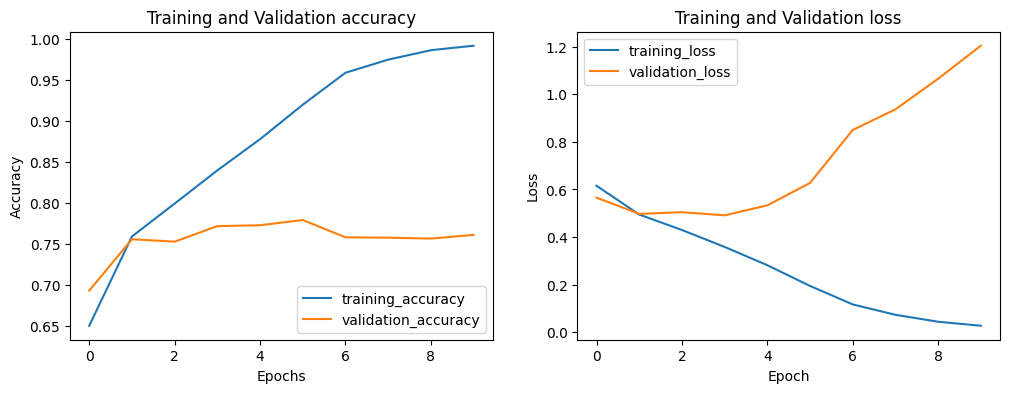

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_2.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_2.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_2.history['loss'], label='training_loss')
plt.plot(mod_2.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
model_2.evaluate(test_ds)

147/147 [==============================] - 41s 278ms/step - loss: 1.1823 - accuracy: 0.7644


[1.1823228597640991, 0.7644169330596924]

In [ ]:
# Modello 2.2
model_22=Sequential()

model_22.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (128,128,3)))
model_22.add(Activation(activation="relu"))
model_22.add(MaxPooling2D(pool_size=(2,2)))

model_22.add(Conv2D(filters=64, kernel_size=(3,3)))
model_22.add(Activation(activation="relu"))
model_22.add(MaxPooling2D(pool_size=(2,2)))

model_22.add(Flatten())
model_22.add(Dense(64)) 
model_22.add(Activation("relu"))

model_22.add(Dense(1))
model_22.add(Activation("sigmoid"))

In [ ]:
model_22.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= ["accuracy"])

model_22.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 activation_7 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_8 (Activation)   (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [ ]:
mod_22=model_22.fit(training_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
469/469 [==============================] - 461s 981ms/step - loss: 0.5957 - accuracy: 0.6776 - val_loss: 0.5352 - val_accuracy: 0.7287
Epoch 2/10
469/469 [==============================] - 462s 986ms/step - loss: 0.4749 - accuracy: 0.7723 - val_loss: 0.4742 - val_accuracy: 0.7802
Epoch 3/10
469/469 [==============================] - 459s 979ms/step - loss: 0.3828 - accuracy: 0.8263 - val_loss: 0.4683 - val_accuracy: 0.7901
Epoch 4/10
469/469 [==============================] - 459s 979ms/step - loss: 0.2874 - accuracy: 0.8767 - val_loss: 0.5253 - val_accuracy: 0.7794
Epoch 5/10
469/469 [==============================] - 462s 985ms/step - loss: 0.1821 - accuracy: 0.9277 - val_loss: 0.7102 - val_accuracy: 0.7621
Epoch 6/10
469/469 [==============================] - 459s 979ms/step - loss: 0.1083 - accuracy: 0.9600 - val_loss: 0.7622 - val_accuracy: 0.7706
Epoch 7/10
469/469 [==============================] - 458s 977ms/step - loss: 0.0558 - accuracy: 0.9818 - val_loss: 1.0054 -

Text(0.5, 1.0, 'Training and Validation loss')

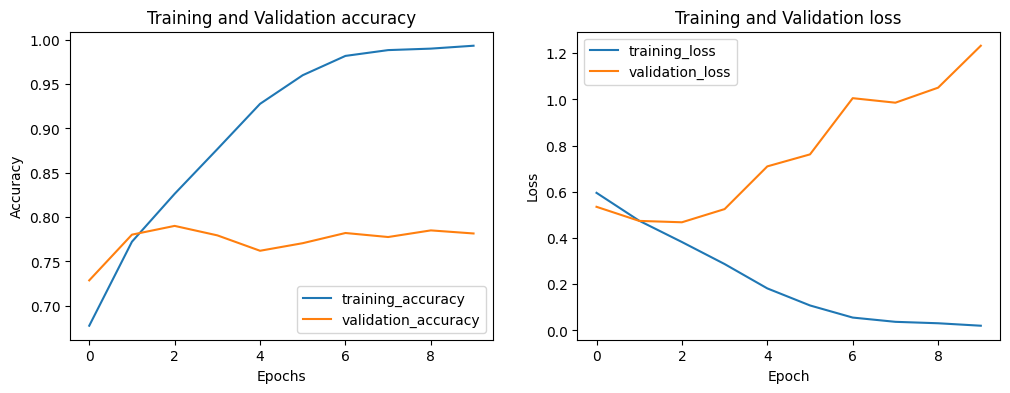

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_22.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_22.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_22.history['loss'], label='training_loss')
plt.plot(mod_22.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
model_22.evaluate(test_ds)

147/147 [==============================] - 48s 323ms/step - loss: 1.2584 - accuracy: 0.7824


[1.2583833932876587, 0.7823579907417297]

**Models with 3 convolutional layers**

In [ ]:
# Modello 3 
model_3=Sequential()

model_3.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (128,128,3)))
model_3.add(Activation(activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Conv2D(filters=64, kernel_size=(3,3)))
model_3.add(Activation(activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2,2))) 

model_3.add(Conv2D(filters=64, kernel_size=(3,3)))
model_3.add(Activation(activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2,2))) 

model_3.add(Flatten())
model_3.add(Dense(64)) 
model_3.add(Activation("relu"))

model_3.add(Dense(1))
model_3.add(Activation("sigmoid"))

In [ ]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= ["accuracy"])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 activation_11 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_12 (Activation)  (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [ ]:
mod_3 = model_3.fit(training_ds,epochs=25,validation_data = validation_ds)

Epoch 1/25
469/469 [==============================] - 524s 1s/step - loss: 0.6406 - accuracy: 0.6148 - val_loss: 0.5515 - val_accuracy: 0.7103
Epoch 2/25
469/469 [==============================] - 514s 1s/step - loss: 0.5140 - accuracy: 0.7462 - val_loss: 0.4751 - val_accuracy: 0.7757
Epoch 3/25
469/469 [==============================] - 516s 1s/step - loss: 0.4383 - accuracy: 0.7944 - val_loss: 0.4382 - val_accuracy: 0.7936
Epoch 4/25
469/469 [==============================] - 517s 1s/step - loss: 0.3770 - accuracy: 0.8304 - val_loss: 0.3947 - val_accuracy: 0.8283
Epoch 5/25
469/469 [==============================] - 513s 1s/step - loss: 0.3153 - accuracy: 0.8597 - val_loss: 0.4202 - val_accuracy: 0.8232
Epoch 6/25
469/469 [==============================] - 516s 1s/step - loss: 0.2633 - accuracy: 0.8893 - val_loss: 0.4465 - val_accuracy: 0.8166
Epoch 7/25
469/469 [==============================] - 516s 1s/step - loss: 0.1938 - accuracy: 0.9196 - val_loss: 0.4997 - val_accuracy: 0.8096

Text(0.5, 1.0, 'Training and Validation loss')

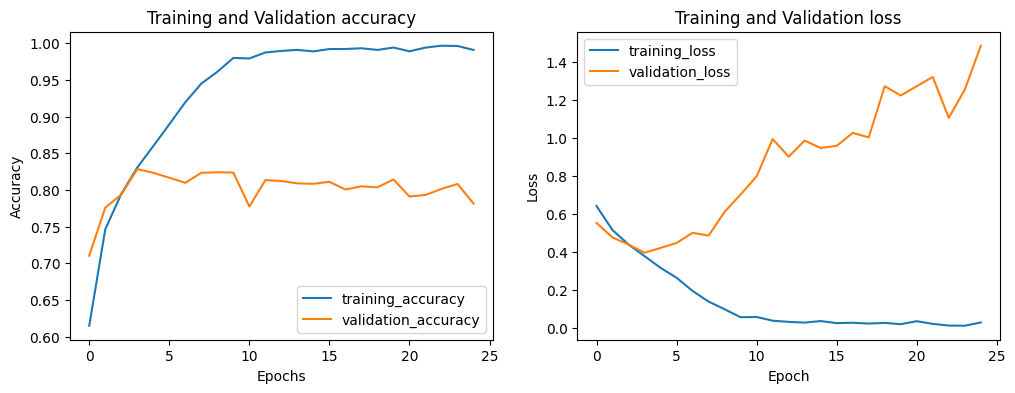

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_3.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_3.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_3.history['loss'], label='training_loss')
plt.plot(mod_3.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
model_3.evaluate(test_ds)

147/147 [==============================] - 53s 357ms/step - loss: 1.3398 - accuracy: 0.7950


[1.339773178100586, 0.7949594259262085]

In [ ]:
# Modello 3.2
model_32=Sequential()

model_32.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (128,128,3)))
model_32.add(Activation(activation="relu"))
model_32.add(MaxPooling2D(pool_size=(2,2)))

model_32.add(Conv2D(filters=64, kernel_size=(3,3)))
model_32.add(Activation(activation="relu"))
model_32.add(MaxPooling2D(pool_size=(2,2))) 

model_32.add(Conv2D(filters=128, kernel_size=(3,3)))
model_32.add(Activation(activation="relu"))
model_32.add(MaxPooling2D(pool_size=(2,2))) 

model_32.add(Flatten())
model_32.add(Dense(64)) 
model_32.add(Activation("relu"))

model_32.add(Dense(1))
model_32.add(Activation("sigmoid"))

In [ ]:
model_32.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= ["accuracy"])
model_32.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [ ]:
mod_32 = model_32.fit(training_ds,epochs=25,validation_data = validation_ds)

Epoch 1/25
469/469 [==============================] - 77s 139ms/step - loss: 0.6502 - accuracy: 0.5993 - val_loss: 0.5724 - val_accuracy: 0.6996
Epoch 2/25
469/469 [==============================] - 73s 156ms/step - loss: 0.5374 - accuracy: 0.7242 - val_loss: 0.4983 - val_accuracy: 0.7605
Epoch 3/25
469/469 [==============================] - 64s 137ms/step - loss: 0.4622 - accuracy: 0.7810 - val_loss: 0.4502 - val_accuracy: 0.7872
Epoch 4/25
469/469 [==============================] - 62s 133ms/step - loss: 0.3974 - accuracy: 0.8189 - val_loss: 0.4236 - val_accuracy: 0.8072
Epoch 5/25
469/469 [==============================] - 65s 138ms/step - loss: 0.3331 - accuracy: 0.8541 - val_loss: 0.4156 - val_accuracy: 0.8155
Epoch 6/25
469/469 [==============================] - 64s 136ms/step - loss: 0.2589 - accuracy: 0.8909 - val_loss: 0.4128 - val_accuracy: 0.8318
Epoch 7/25
469/469 [==============================] - 64s 136ms/step - loss: 0.1945 - accuracy: 0.9228 - val_loss: 0.4834 - val_ac

Text(0.5, 1.0, 'Training and Validation loss')

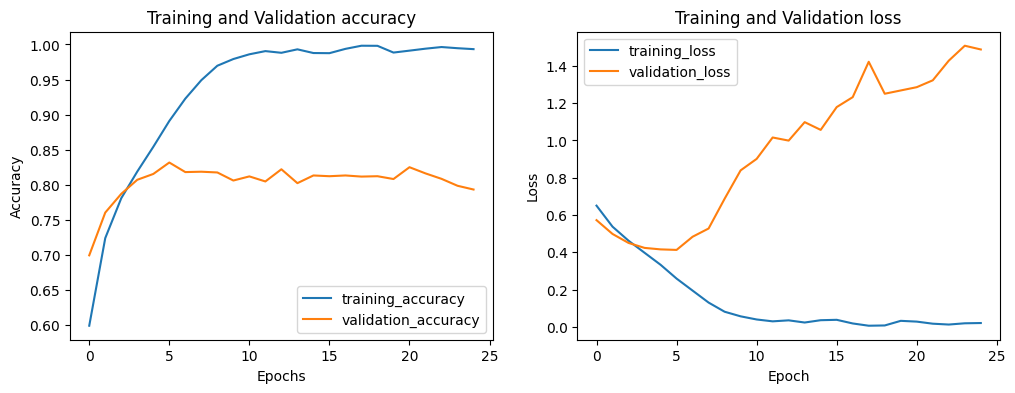

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_32.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_32.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_32.history['loss'], label='training_loss')
plt.plot(mod_32.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
model_32.evaluate(test_ds)

147/147 [==============================] - 16s 108ms/step - loss: 1.4780 - accuracy: 0.7886


[1.4779996871948242, 0.788551926612854]